<a href="https://colab.research.google.com/github/dmburns1729/Class-Files/blob/main/Copy_of_Formatting_Date_Xticks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U pandas
!pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vQcpVvVioO23cndDwr1UmKhndrSq6ES6ZUKZ4fkBBqIAavd1_coVPO_yeOye-Ub-cAWlkX3psJvOU8o/pub?output=csv"
df = pd.read_csv(url)
df['datetime'] = pd.to_datetime(df['date'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   object        
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
 5   datetime      1462 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.7+ KB


In [ ]:
df

,date,meantemp,humidity,wind_speed,meanpressure,datetime
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013-01-01
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013-01-02
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013-01-03
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013-01-04
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013-01-05
...,...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217,2016-12-28
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762,2016-12-29
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762,2016-12-30
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000,2016-12-31


In [ ]:
df = df.set_index('datetime')
df


,date,meantemp,humidity,wind_speed,meanpressure
datetime,,,,,
2013-01-01,2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
2016-12-28,2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [ ]:
ts = df['meantemp'].copy()
ts



datetime
2013-01-01    10.000000
2013-01-02     7.400000
2013-01-03     7.166667
2013-01-04     8.666667
2013-01-05     6.000000
                ...    
2016-12-28    17.217391
2016-12-29    15.238095
2016-12-30    14.095238
2016-12-31    15.052632
2017-01-01    10.000000
Name: meantemp, Length: 1462, dtype: float64

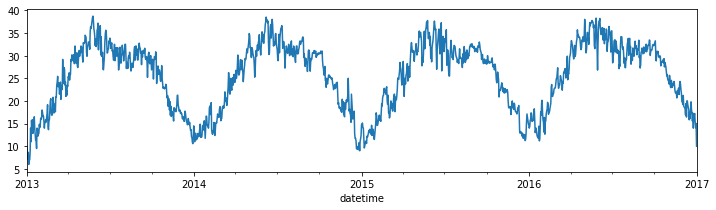

In [ ]:
ax = ts.plot();



In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']



[12.0, 3.0]

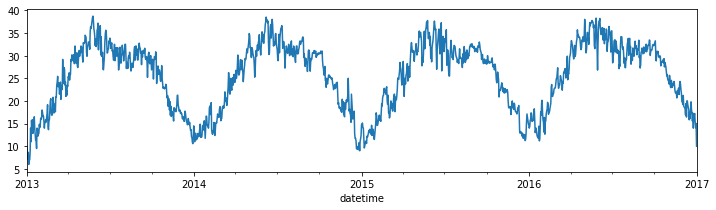

In [ ]:
## plot a 12x3 figure
ts.plot(figsize=(12,3));



In [ ]:
## setting the default figsize for this notebook
plt.rcParams['figure.figsize'] = (12,3)



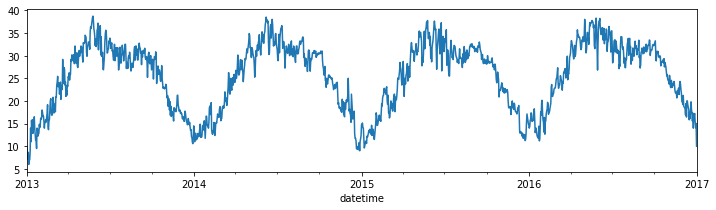

In [ ]:
ax = ts.plot();



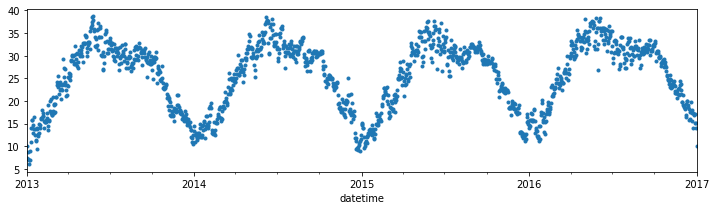

In [ ]:
## we can also visualize just the markers without the line
ax = ts.plot(style='.');



# Formatting Date Xticks

For more complex formatting, there are tools in matplotlib designed to allow us to customize the dates on our axis.


## Matplotlib's Artists
There are special classes in base matplotlib (not in matplotlib.pyplot) that are designed to update the spacing and text formatting of our x and y ticks.

Tick-Formatting Artists:

For general use cases, these artists are located in matplotlib's ticker submodule.
Dates, however, have their own submodule called dates

In [ ]:
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates



In [ ]:
## creating our tick locators and formatters
# create the locator to place ticks every 3 months.
loc_3months = mdates.MonthLocator(interval=3)
# create the formatter to display 3-letter month names + 2-digit year
fmt_months = mdates.DateFormatter("%B-%y")



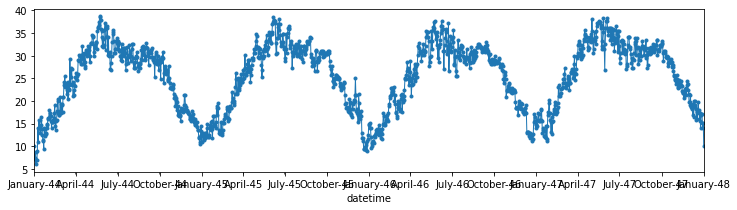

In [ ]:
## Plot the time series with pandas
## Adding . markers and a thinner line
ax = ts.plot(marker='.',lw=1);
ax.xaxis.set_major_locator(loc_3months)
ax.xaxis.set_major_formatter(fmt_months)



## Fixing Overlapping Labels

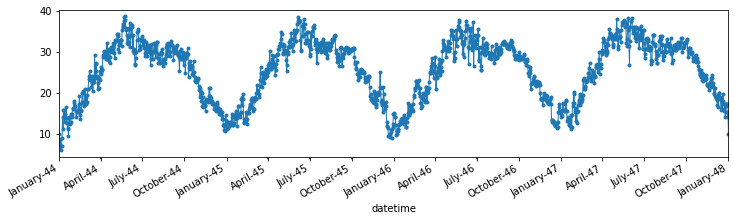

In [ ]:
##  Plot the time series with pandas
ax = ts.plot(marker='.',lw=1);
ax.xaxis.set_major_locator(loc_3months)
ax.xaxis.set_major_formatter(fmt_months)
##  Using ax.get_figure()
fig = ax.get_figure()
fig.autofmt_xdate()



In [ ]:
ts

datetime
2013-01-01    10.000000
2013-01-02     7.400000
2013-01-03     7.166667
2013-01-04     8.666667
2013-01-05     6.000000
                ...    
2016-12-28    17.217391
2016-12-29    15.238095
2016-12-30    14.095238
2016-12-31    15.052632
2017-01-01    10.000000
Name: meantemp, Length: 1462, dtype: float64